In [1]:
# Test XGB and SHAP using GPU

import xgboost as xgb
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../data/thrombolysis_xgb_data_2017_2019.csv')
X = data.drop(['thrombolysis'], axis=1)
y = data['thrombolysis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# One hot encode stroke team
X_train_hosp = pd.get_dummies(X_train['stroke_team'], prefix = 'team')
X_train = pd.concat([X_train, X_train_hosp], axis=1)
X_train.drop('stroke_team', axis=1, inplace=True)
X_test_hosp = pd.get_dummies(X_test['stroke_team'], prefix = 'team')
X_test = pd.concat([X_test, X_test_hosp], axis=1)
X_test.drop('stroke_team', axis=1, inplace=True) 

In [3]:
# Fit XGB model using GPU
xgb_model_GPU = xgb.XGBClassifier(learning_rate=0.5, random_state=42, tree_method='gpu_hist')
xgb_model_GPU.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [4]:
# Get SHAP values
explainer = shap.TreeExplainer(xgb_model_GPU)
shap_values = explainer.shap_values(X_train)

# Show average feature SHAP values as a DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_df = shap_df.abs().mean().sort_values(ascending=False).reset_index()
shap_df.columns = ['feature', 'shap_value']
shap_df

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


,feature,shap_value
0,infarction,1.488799
1,arrival_to_scan_time,0.948935
2,stroke_severity,0.947120
3,precise_onset_known,0.510379
4,prior_disability,0.414424
...,...,...
118,team_Northumbria Specialist Emergency Care Hos...,0.001394
119,team_Salisbury District Hospital,0.001247
120,team_Dorset County Hospital,0.001143
121,team_Warwick Hospital,0.001117


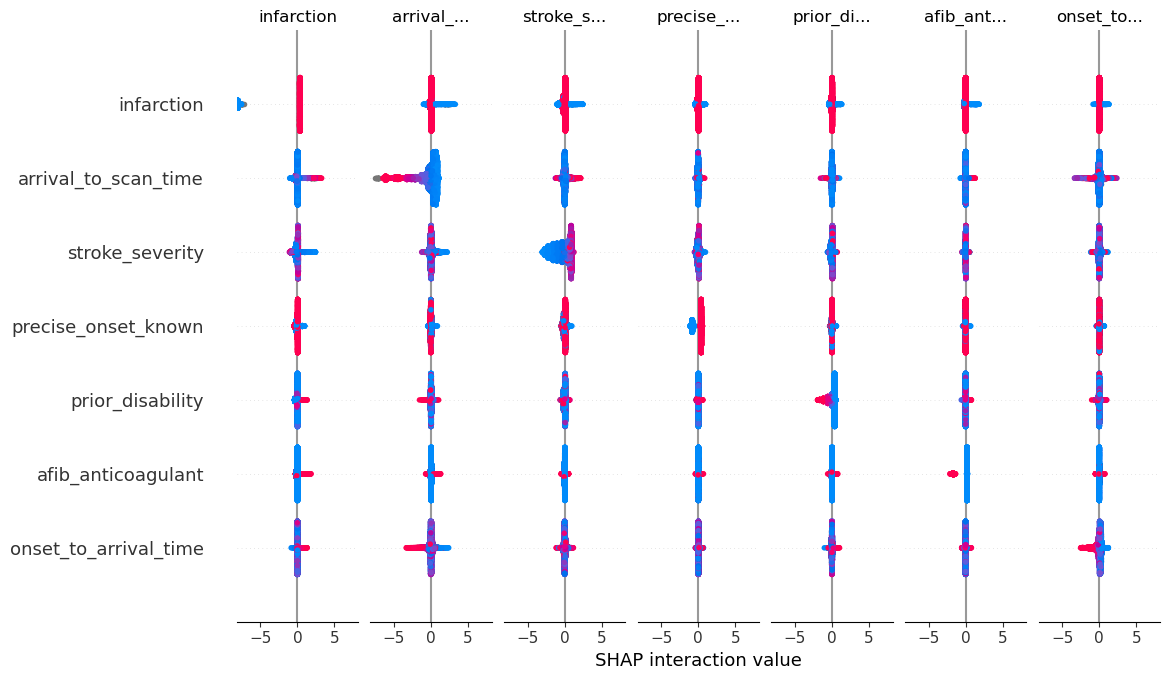

In [12]:
# Calculate SHAP interaction values for a sample of 10,000 rows
X_train_sample = X_train.sample(10000, random_state=42)
shap_interaction_values = explainer.shap_interaction_values(X_train_sample)

# Plot SHAP interaction values
shap.summary_plot(shap_interaction_values, X_train_sample)

In [13]:
# Fit XGB model using CPU
xgb_model_cpu = xgb.XGBClassifier(learning_rate=0.5, random_state=42)
xgb_model_cpu.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [14]:
# Get SHAP values (using the CPU model)
explainer_cpu = shap.TreeExplainer(xgb_model_cpu)
shap_values_cpu = explainer_cpu.shap_values(X_train)

# Show average feature SHAP values as a DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)
shap_df = shap_df.abs().mean().sort_values(ascending=False).reset_index()
shap_df.columns = ['feature', 'shap_value']
shap_df

,feature,shap_value
0,infarction,1.488799
1,arrival_to_scan_time,0.948935
2,stroke_severity,0.947120
3,precise_onset_known,0.510379
4,prior_disability,0.414424
...,...,...
118,team_Northumbria Specialist Emergency Care Hos...,0.001394
119,team_Salisbury District Hospital,0.001247
120,team_Dorset County Hospital,0.001143
121,team_Warwick Hospital,0.001117


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


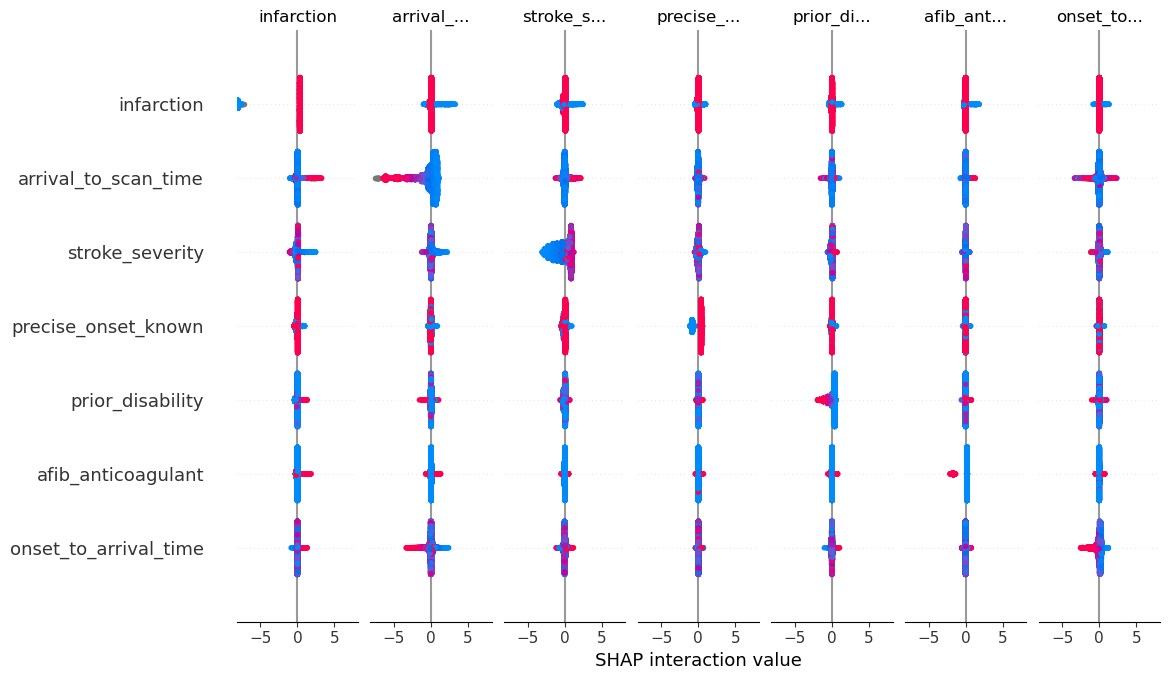

In [15]:
# Calculate SHAP interaction values for a sample of 10,000 rows
X_train_sample = X_train.sample(10000, random_state=42)
shap_interaction_values = explainer.shap_interaction_values(X_train_sample)

# Plot SHAP interaction values
shap.summary_plot(shap_interaction_values, X_train_sample)